<a href="https://colab.research.google.com/github/wjyandre/deep_learning_attempt/blob/master/nn_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [0]:
x_train, x_test = tf.keras.utils.normalize(x_train, axis=0),tf.keras.utils.normalize(x_test, axis=0)

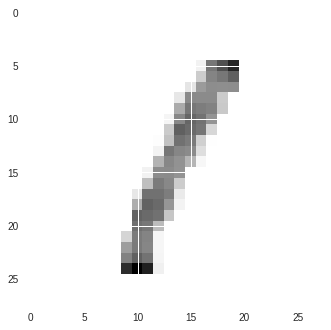

In [19]:
plt.imshow(x_train[77])

In [24]:
# feedforward nn
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10,activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 132us/step - loss: 0.5513 - acc: 0.8379
Epoch 2/5
60000/60000 [==============================] - 7s 125us/step - loss: 0.2604 - acc: 0.9242
Epoch 3/5
60000/60000 [==============================] - 7s 120us/step - loss: 0.2027 - acc: 0.9398
Epoch 4/5
60000/60000 [==============================] - 7s 124us/step - loss: 0.1613 - acc: 0.9522
Epoch 5/5
60000/60000 [==============================] - 7s 125us/step - loss: 0.1327 - acc: 0.9604


In [25]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 0s 37us/step
0.21216164312607724
0.9531


In [0]:
# cnn
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train=x_train/255
x_test=x_test/255

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 51s 852us/step - loss: 0.1640 - acc: 0.9505
Epoch 2/3
60000/60000 [==============================] - 52s 870us/step - loss: 0.0575 - acc: 0.9823
Epoch 3/3
60000/60000 [==============================] - 52s 860us/step - loss: 0.0412 - acc: 0.9873


In [31]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 4s 355us/step
0.04598729980699572
0.9862


2


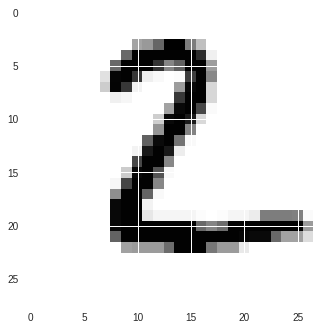

In [40]:
plt.imshow(x_test[1].reshape(28,28))
pred=model.predict(x_test[1].reshape(1,28,28,1))
print(pred.argmax())

In [37]:
x_test[1].shape

(28, 28, 1)